In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./basicPythonBenchmark.zip
./test.csv
./randomBenchmark.zip
./data.zip
./train.csv
./testOrderBenchmark.zip
./Day4.ipynb
./.ipynb_checkpoints/Day4-checkpoint.ipynb


In [3]:
# Unzipping the data files
#!unzip ./data.zip

In [4]:
expedia_data=pd.read_csv("./train.csv")

In [5]:
expedia_data.describe()

srch_id       site_id  visitor_location_country_id  \
count  9.917530e+06  9.917530e+06                 9.917530e+06   
mean   3.329138e+05  9.966175e+00                 1.752954e+02   
std    1.922876e+05  7.657325e+00                 6.590955e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    1.665160e+05  5.000000e+00                 1.000000e+02   
50%    3.328140e+05  5.000000e+00                 2.190000e+02   
75%    4.999000e+05  1.400000e+01                 2.190000e+02   
max    6.655740e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            505297.000000         507612.000000     9.917530e+06   
mean                  3.374634            176.588512     1.739055e+02   
std                   0.692218            108.434842     6.834768e+01   
min                   1.000000              0.000000     1.000000e+00   
25%                   2.920000            110.330000     1.000000e+02   
50%                   3.440000            151.830000     2.190000e+02   
75%                   3.940000            214.350000     2.190000e+02   
max                   5.000000           2768.930000     2.300000e+02   

            prop_id  prop_starrating  prop_review_score  prop_brand_bool  ...  \
count  9.917530e+06     9.917530e+06       9.902900e+06     9.917530e+06  ...   
mean   7.008015e+04     3.181534e+00       3.777702e+00     6.343042e-01  ...   
std    4.061177e+04     1.050191e+00       1.050806e+00     4.816248e-01  ...   
min    1.000000e+00     0.000000e+00       0.000000e+00     0.000000e+00  ...   
25%    3.501000e+04     3.000000e+00       3.500000e+00     0.000000e+00  ...   
50%    6.961500e+04     3.000000e+00       4.000000e+00     1.000000e+00  ...   
75%    1.051770e+05     4.000000e+00       4.500000e+00     1.000000e+00  ...   
max    1.408210e+05     5.000000e+00       5.000000e+00     1.000000e+00  ...   

       comp6_rate_percent_diff     comp7_rate      comp7_inv  \
count             1.933120e+05  631077.000000  713175.000000   
mean              2.301390e+01       0.147061       0.082259   
std               2.560429e+03       0.578748       0.316165   
min               2.000000e+00      -1.000000      -1.000000   
25%               6.000000e+00       0.000000       0.000000   
50%               1.100000e+01       0.000000       0.000000   
75%               1.800000e+01       1.000000       0.000000   
max               1.125686e+06       1.000000       1.000000   

       comp7_rate_percent_diff    comp8_rate     comp8_inv  \
count            277838.000000  3.819043e+06  3.960388e+06   
mean                 20.141888 -6.072490e-02  9.889435e-03   
std                 136.217976  4.692456e-01  2.031648e-01   
min                   2.000000 -1.000000e+00 -1.000000e+00   
25%                   7.000000  0.000000e+00  0.000000e+00   
50%                  12.000000  0.000000e+00  0.000000e+00   
75%                  20.000000  0.000000e+00  0.000000e+00   
max               30216.000000  1.000000e+00  1.000000e+00   

       comp8_rate_percent_diff    click_bool  gross_bookings_usd  booking_bool  
count             1.225707e+06  9.917530e+06       276592.000000  9.917530e+06  
mean              2.321000e+01  4.473614e-02          386.530099  2.788930e-02  
std               9.462088e+02  2.067240e-01          801.073164  1.646557e-01  
min               2.000000e+00  0.000000e+00            0.000000  0.000000e+00  
25%               7.000000e+00  0.000000e+00          124.240000  0.000000e+00  
50%               1.100000e+01  0.000000e+00          219.420000  0.000000e+00  
75%               1.700000e+01  0.000000e+00          431.760000  0.000000e+00  
max               1.494000e+05  1.000000e+00       167740.590000  1.000000e+00  

[8 rows x 53 columns]

In [6]:
expedia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917530 entries, 0 to 9917529
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [7]:
expedia_data.isnull().sum().sort_values(ascending=False).index

Index(['comp1_rate_percent_diff', 'comp6_rate_percent_diff', 'comp1_rate',
       'comp1_inv', 'comp4_rate_percent_diff', 'gross_bookings_usd',
       'comp7_rate_percent_diff', 'comp6_rate', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'comp6_inv', 'comp4_rate', 'comp7_rate',
       'srch_query_affinity_score', 'comp4_inv', 'comp7_inv',
       'comp3_rate_percent_diff', 'comp2_rate_percent_diff',
       'comp8_rate_percent_diff', 'comp5_rate_percent_diff', 'comp3_rate',
       'comp3_inv', 'comp8_rate', 'comp8_inv', 'comp2_rate', 'comp2_inv',
       'comp5_rate', 'comp5_inv', 'orig_destination_distance',
       'prop_location_score2', 'prop_review_score', 'prop_id',
       'prop_starrating', 'prop_brand_bool', 'booking_bool', 'prop_country_id',
       'visitor_location_country_id', 'site_id', 'date_time',
       'prop_location_score1', 'random_bool', 'prop_log_historical_price',
       'position', 'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_o

In [ ]:
null_data = ['comp1_rate_percent_diff', 'comp6_rate_percent_diff', 'comp1_rate',
       'comp1_inv', 'comp4_rate_percent_diff', 'comp7_rate_percent_diff',
       'comp6_rate', 'comp6_inv', 'comp4_rate', 'comp7_rate', 'srch_query_affinity_score',
       'comp4_inv', 'comp7_inv', 'comp3_rate_percent_diff',
       'comp2_rate_percent_diff', 'comp8_rate_percent_diff',
       'comp5_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp8_rate',
       'comp8_inv', 'comp2_rate', 'comp2_inv', 'comp5_rate', 'comp5_inv','srch_id']

In [9]:
expedia_data=expedia_data.drop(null_data,axis=1)

In [10]:
expedia_data.isnull().sum()

site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      3216461
random_bool                          0
click_bool                           0
gross_bookings_usd       

In [11]:
expedia_data.head()

site_id  visitor_location_country_id  visitor_hist_starrating  \
0       12                          187                      NaN   
1       12                          187                      NaN   
2       12                          187                      NaN   
3       12                          187                      NaN   
4       12                          187                      NaN   

   visitor_hist_adr_usd  prop_country_id  prop_id  prop_starrating  \
0                   NaN              219      893                3   
1                   NaN              219    10404                4   
2                   NaN              219    21315                3   
3                   NaN              219    27348                2   
4                   NaN              219    29604                4   

   prop_review_score  prop_brand_bool  prop_location_score1  ...  \
0                3.5                1                  2.83  ...   
1                4.0                1                  2.20  ...   
2                4.5                1                  2.20  ...   
3                4.0                1                  2.83  ...   
4                3.5                1                  2.64  ...   

   srch_booking_window  srch_adults_count  srch_children_count  \
0                    0                  4                    0   
1                    0                  4                    0   
2                    0                  4                    0   
3                    0                  4                    0   
4                    0                  4                    0   

   srch_room_count  srch_saturday_night_bool  orig_destination_distance  \
0                1                         1                        NaN   
1                1                         1                        NaN   
2                1                         1                        NaN   
3                1                         1                        NaN   
4                1                         1                        NaN   

   random_bool  click_bool  gross_bookings_usd  booking_bool  
0            1           0                 NaN             0  
1            1           0                 NaN             0  
2            1           0                 NaN             0  
3            1           0                 NaN             0  
4            1           0                 NaN             0  

[5 rows x 27 columns]

In [12]:
#dropping columns with NAN values
expedia_data.dropna(inplace=True)

In [13]:
expedia_data.head()

site_id  visitor_location_country_id  visitor_hist_starrating  \
568        14                          100                     4.31   
586        16                           31                     2.50   
1082        5                          219                     2.50   
1206       16                           31                     3.74   
3196       32                           55                     5.00   

      visitor_hist_adr_usd  prop_country_id  prop_id  prop_starrating  \
568                 180.75              137    77040                4   
586                 270.08               31    13962                4   
1082                122.34              219   107761                4   
1206                210.60               31    33406                4   
3196                185.91              129    19663                4   

      prop_review_score  prop_brand_bool  prop_location_score1  ...  \
568                 4.0                0                  3.14  ...   
586                 4.5                1                  6.42  ...   
1082                3.5                1                  2.64  ...   
1206                4.0                1                  0.69  ...   
3196                4.5                0                  1.61  ...   

      srch_booking_window  srch_adults_count  srch_children_count  \
568                     3                  1                    1   
586                     5                  2                    0   
1082                   24                  1                    0   
1206                    3                  1                    0   
3196                    0                  1                    1   

      srch_room_count  srch_saturday_night_bool  orig_destination_distance  \
568                 1                         0                    5593.11   
586                 1                         0                     144.11   
1082                1                         0                     386.87   
1206                1                         1                     166.25   
3196                2                         0                     528.35   

      random_bool  click_bool  gross_bookings_usd  booking_bool  
568             0           1              924.00             1  
586             0           1              128.48             1  
1082            0           1              324.08             1  
1206            0           1               96.90             1  
3196            1           1              141.69             1  

[5 rows x 27 columns]

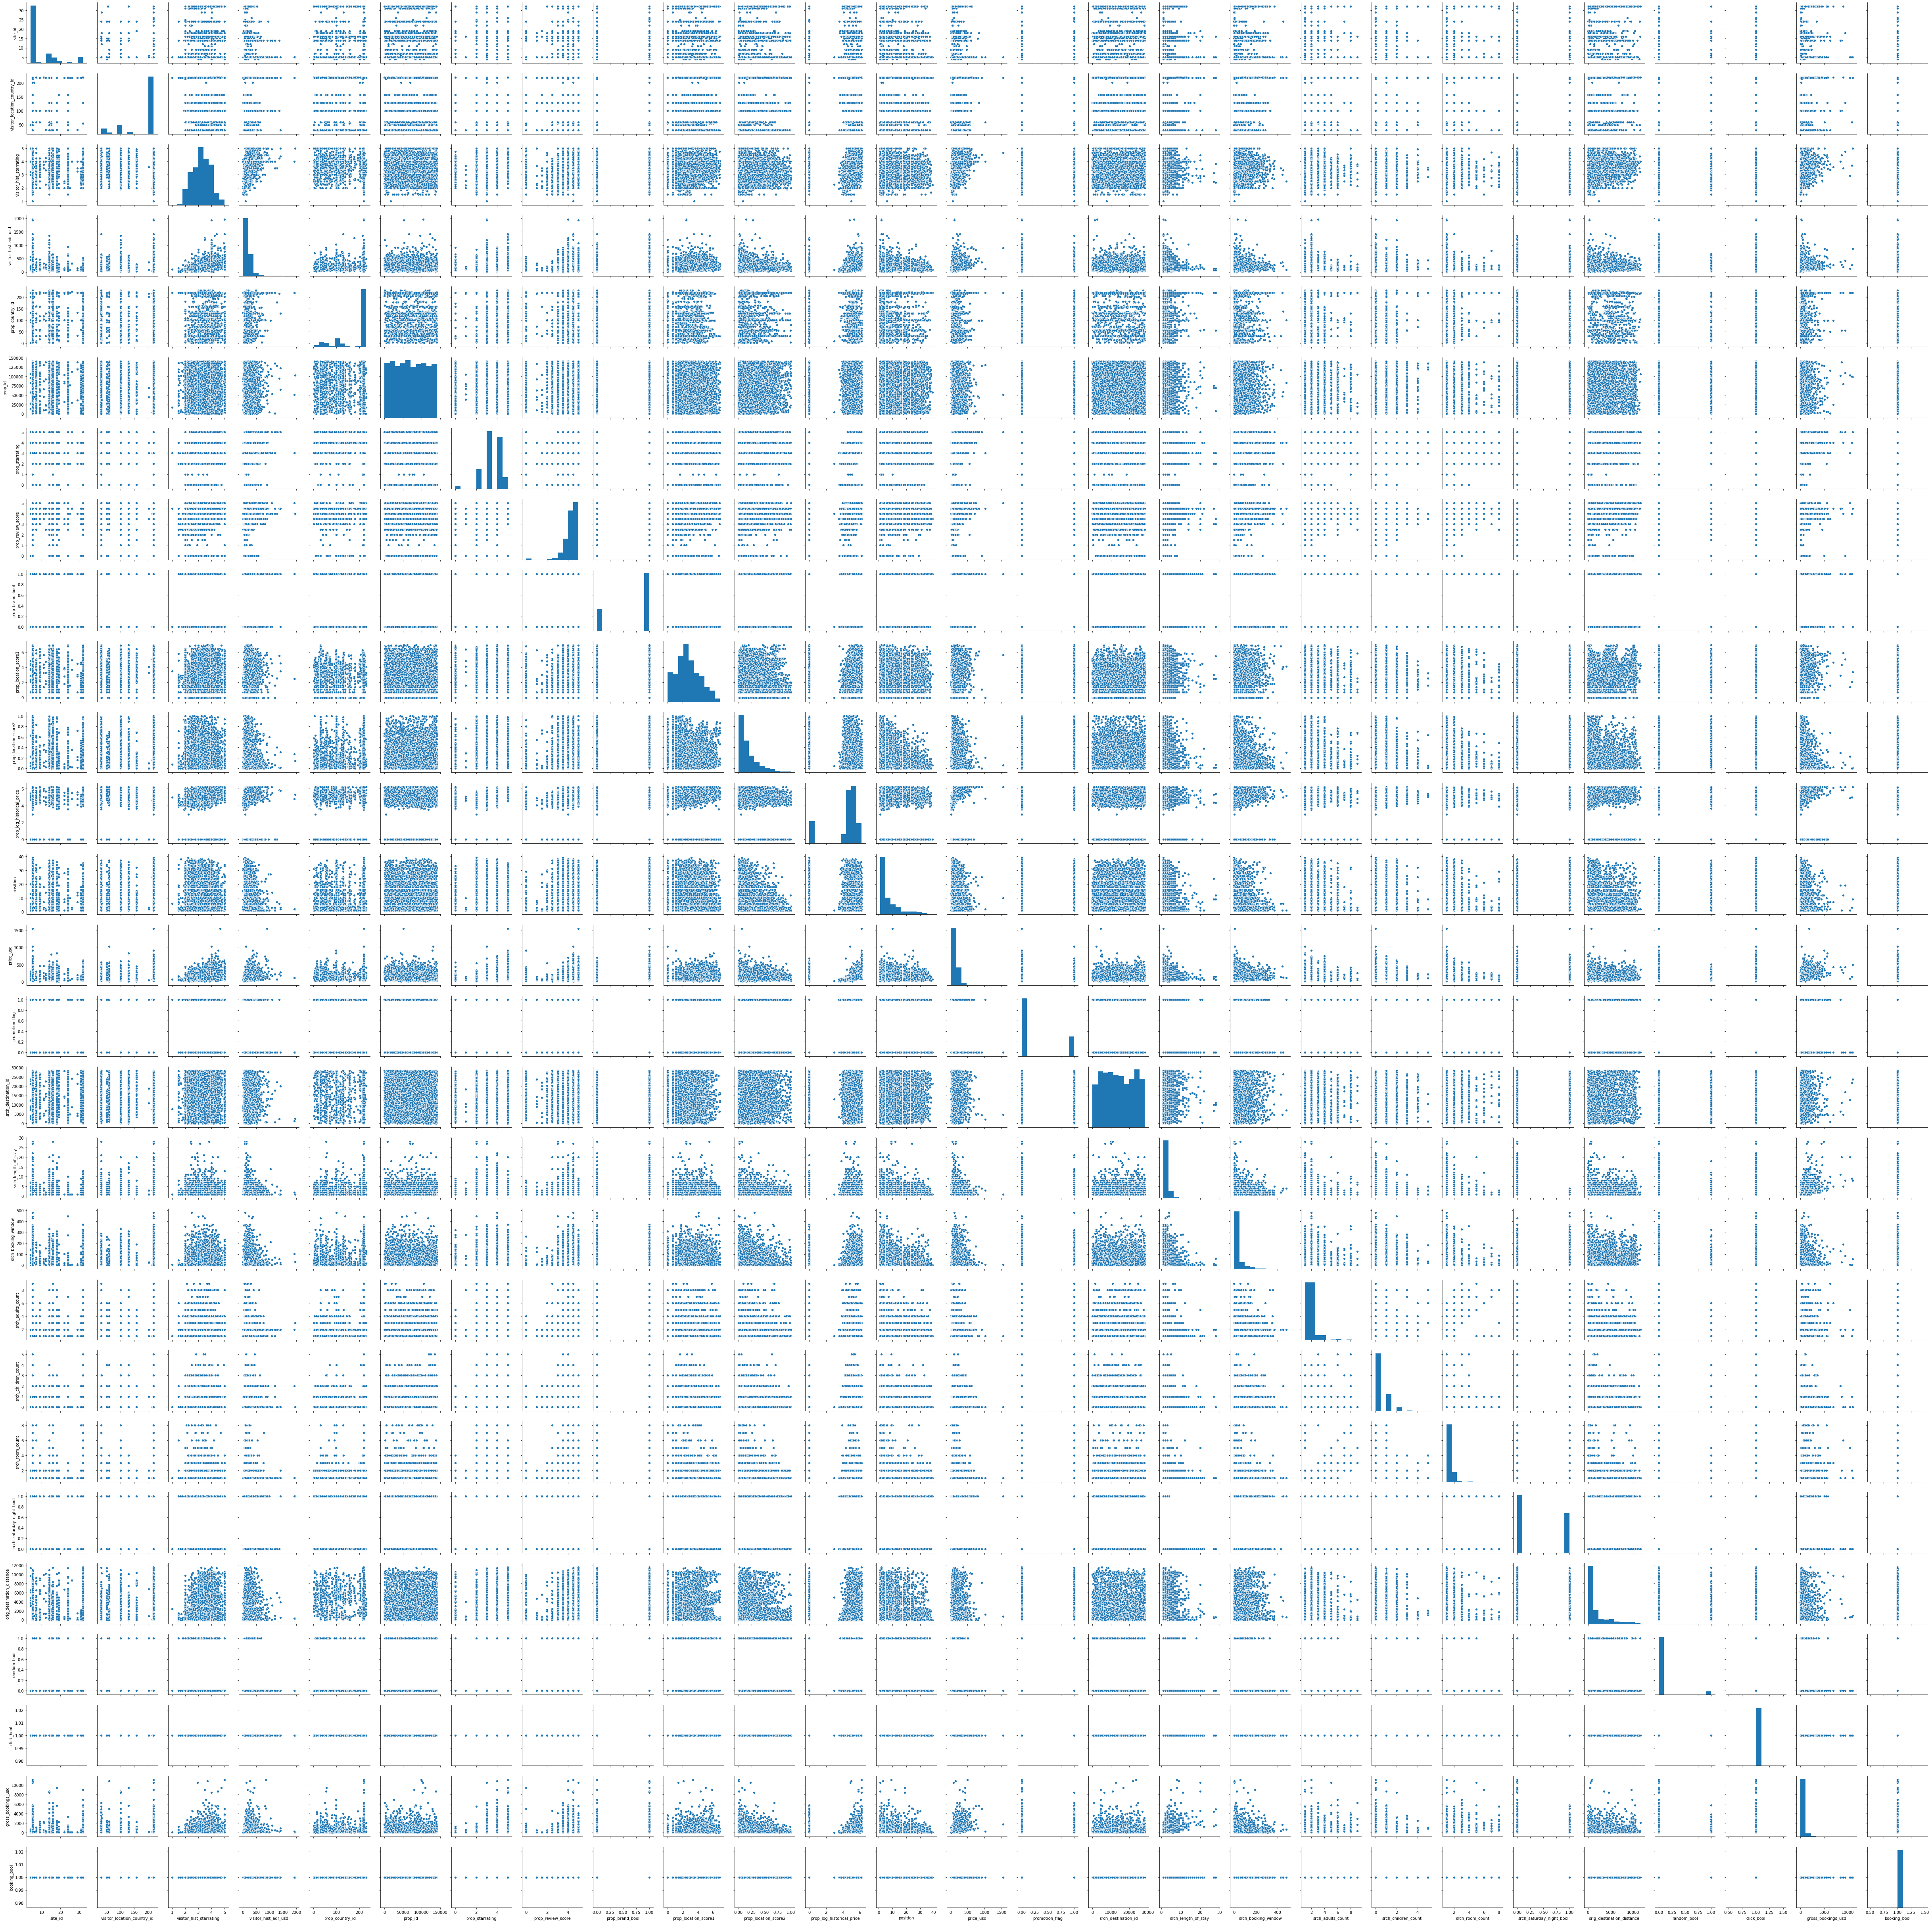

In [14]:
sns.pairplot(expedia_data)

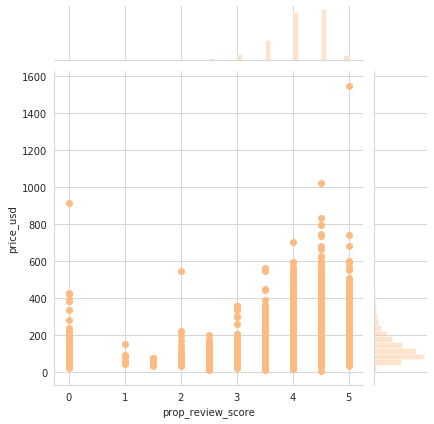

In [37]:
#sns.set_palette("magma_r")
#sns.set_style('whitegrid')
sns.jointplot(x='prop_review_score',y='price_usd',data=expedia_data)

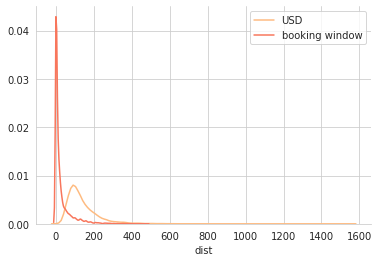

In [38]:
sns.distplot(expedia_data['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(expedia_data['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

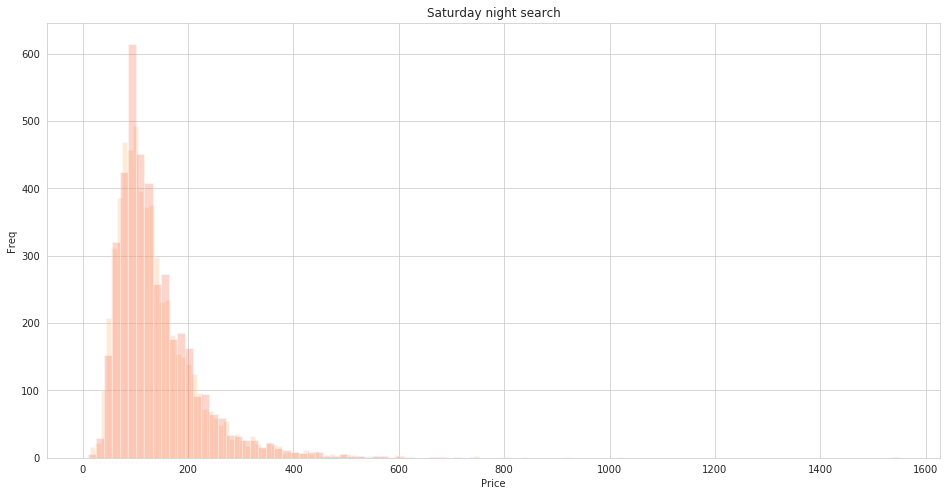

In [54]:
plt.figure(figsize = (16, 8))

plt.hist(expedia_data.loc[expedia_data['srch_saturday_night_bool']==0,'price_usd'], bins = 100, 
         alpha = 0.3, 
         label = 'search without Saturday night stay')

plt.hist(expedia_data.loc[expedia_data['srch_saturday_night_bool']==1,'price_usd'], bins = 100, 
         alpha = 0.3, 
         label = 'search with Saturday night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.title('Saturday night search')
plt.plot();

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,copy=False)

In [45]:
pca_op = pca.fit_transform(expedia_data)

In [46]:
pca.explained_variance_ratio_.sum()

0.9964436016139885

In [47]:
pca_op.shape

(9882, 2)

In [48]:
final_data = pd.DataFrame(data=pca_op,columns=["Principal_Component_1","Principal_Component_2"])

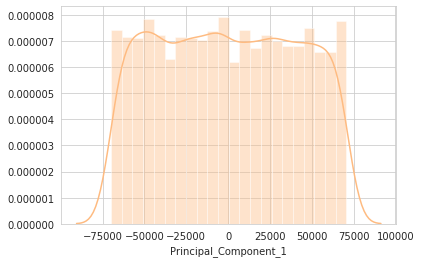

In [51]:
sns.distplot(final_data['Principal_Component_1'])

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Principal_Component_1',y='Principal_Component_2',data=final_data,palette='rainbow_r')

In [ ]:
from sklearn.cluster import KMeans
kmean_data = expedia_data[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)

kmeans = [KMeans(n_clusters = i).fit(kmean_data) for i in n_cluster]
scores = [kmeans[i].score(kmean_data) for i in range(len(kmeans))]

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'blue')

plt.xlabel('clusters num')
plt.ylabel('score')
plt.title('Graph for K-Means')
plt.show()